# Chapter 9 機械学習の基礎（教師なし学習）
# 9-1 教師なし学習
## 9-1-1 教師なし学習のモデルの種類

## 9-1-2 この章で使用するライブラリのインポート

In [2]:
# データ加工・処理・分類ライブラリ
import numpy as np
import numpy.random as random
import scipy as scipy
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

%precision 3

'%.3f'

# 9-2 クラスタリング
## 9-2-1 k-means法

## 9-2-2 k-means法でクラスタリングする
### 2-1 訓練データの作成

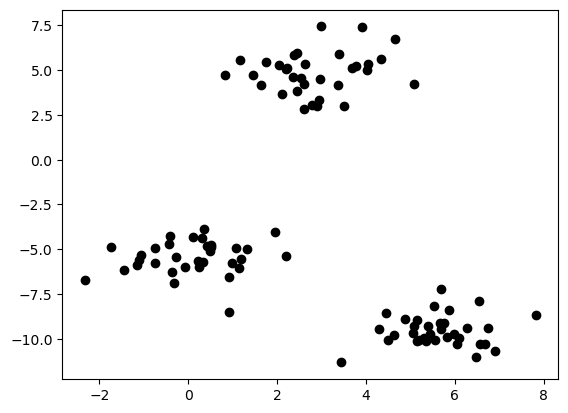

In [3]:
# k-means法を使用するためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意：make_blobsは二つの値を返すため、一方は使用しない"_"で受け取る
X, _ = make_blobs(random_state=10)

# グラフを描画
plt.scatter(X[:, 0], X[:,1], color='black')

### 2-2 KMeansクラスを使ったクラスタリング

In [4]:
# KMeansクラスの可視化
kmeans = KMeans(init='random', n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)

### 2-3 結果の確認

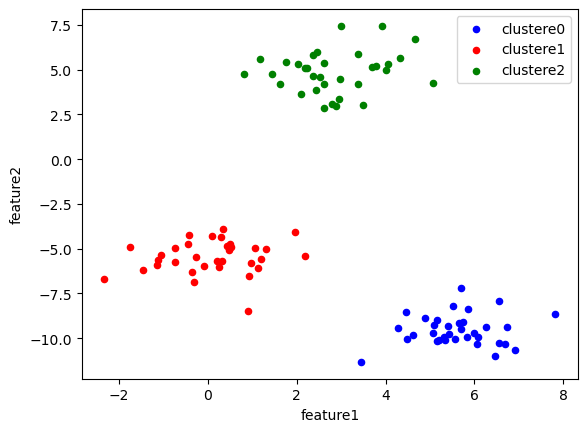

In [5]:
# concatでデータを横に結合（axis=1)を指定
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 上記のデータにて、X軸をfeature1、Y軸をfeature2、クラスター番号をclusterと列名指定
merge_data.columns = ['feature1', 'feature2', 'cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
	ax = data.plot.scatter(x = 'feature1', y = 'feature2', color = colors[i], label = f'clustere{i}', ax=ax)

## 9-2-3 金融マーケティングデータをクラスタリグする
### 3-1 分析要求
### 3-2 分類対象データのダウンロードと読み込み

In [8]:
# webからデータを取得したり、zipファイルを扱うためのライブラリ
import requests, zipfile
import io

# データがあるurl指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# データを取得して展開する
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
# 対象データを読み込み
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()